In [2]:
# LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score, roc_auc_score, multilabel_confusion_matrix, roc_curve
from scipy.sparse import issparse
import time

In [3]:
# DATA
df_brfss = pd.read_csv('/Users/macbook/Library/CloudStorage/GoogleDrive-nurrachmandzakiyullah@gmail.com/My Drive/23. Colab Notebooks/1. AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/3. Fix Model/Final_dataset_Diabetes_Complication.csv')
x = df_brfss.iloc[:, :26].values
X = preprocessing.normalize(x)
y = df_brfss.iloc[:, 26:].values-1

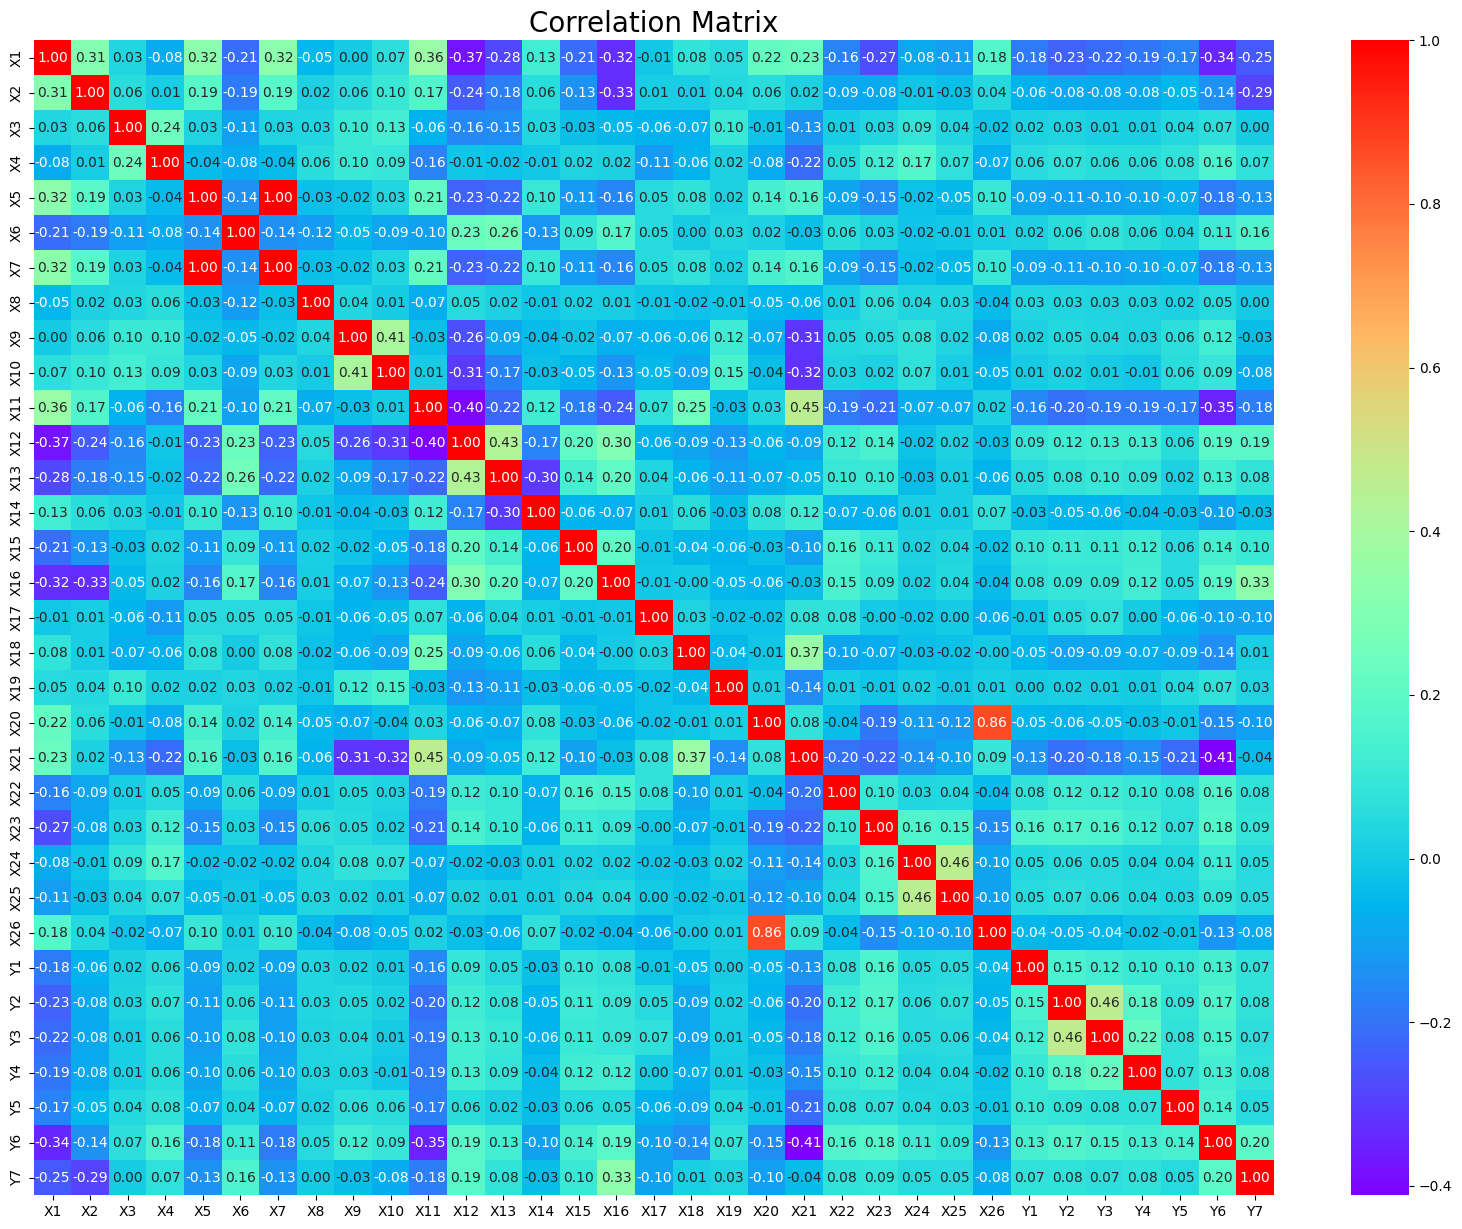

In [4]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_brfss.corr(), annot=True, fmt=".2f", ax=ax, cmap = "rainbow" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [5]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()

In [6]:
import copy
import numpy as np

class BinaryRelevance:
    def __init__(self, classifier):
        self.classifier = classifier

    def fit(self, X, y):
        self.label_count = y.shape[1]
        self.classifiers = []
        for i in range(self.label_count):
            classifier = copy.deepcopy(self.classifier)
            y_subset = y[:, i]
            classifier.fit(X, y_subset)
            self.classifiers.append(classifier)
        return self

    def predict(self, X_pre):
        result = np.zeros((X_pre.shape[0], self.label_count))
        for i in range(self.label_count):
            result[:, i] = self.classifiers[i].predict(X_pre)
        return result


In [7]:
# Decisions Tree Model
# PROBLEM TRANSFORMATION
base_classifier = KNeighborsClassifier()
model = BinaryRelevance(classifier=base_classifier)

In [8]:
# Get the parameter values
params = base_classifier.get_params()

# Print the parameter values
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [9]:
# Train with time
start = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start
print(training_time)

0.1815967559814453


In [10]:
# Testing with time
start = time.time()
# make a prediction on the test set
yhat = model.predict(X_test)
testing_time = time.time() - start
print(testing_time)

yprob=yhat #UNTUK ROC AUC KRITING
# round probabilities to class labels
yhat = yhat.round() #UNTUK EVAL METRIK
print(yprob[1,])
print(yhat[1,])


# 1. Matrix Evaluation Label Based


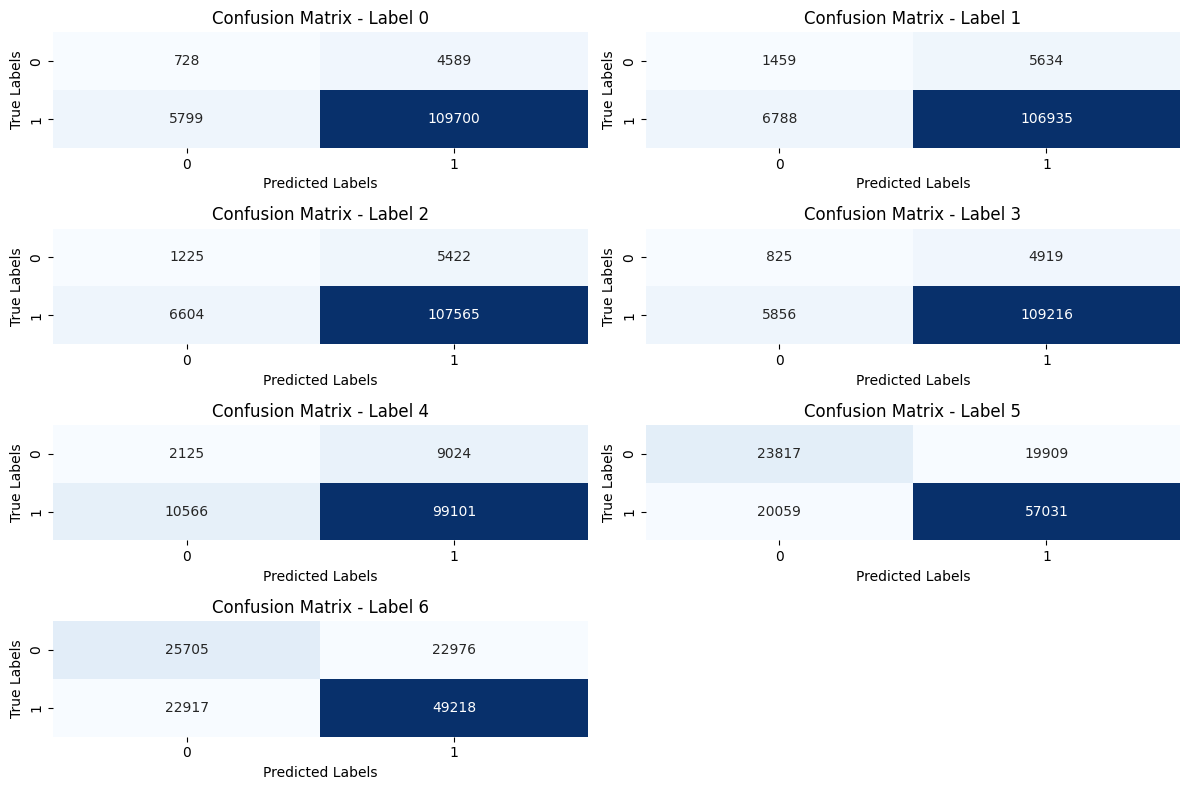

In [ ]:
#hitung CM untuk eval metrik yang lain pre memori

# Multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test, yhat)

# Determine the grid dimensions for subplots
num_labels = cm.shape[0]
cols = min(num_labels, 2)
rows = (num_labels + cols - 1) // cols

# Plot confusion matrix
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (matrix, ax) in enumerate(zip(cm, axes.ravel())):
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Label {i}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Remove unused subplots if necessary
if num_labels < rows * cols:
    for j in range(num_labels, rows * cols):
        fig.delaxes(axes.ravel()[j])

plt.tight_layout()
plt.show()

In [ ]:
# membuat AUC ROC label A
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test[:,1], yprob[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5730034315958478


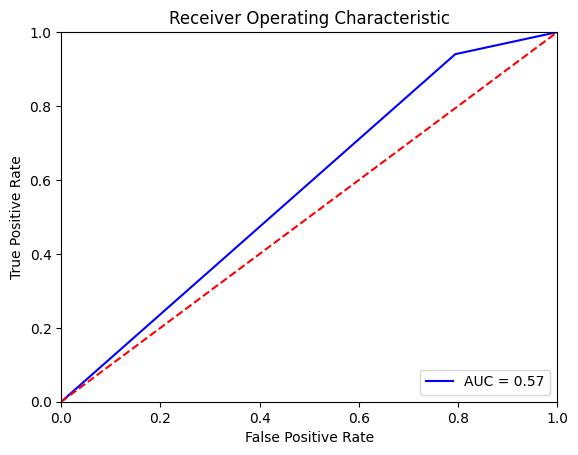

In [ ]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

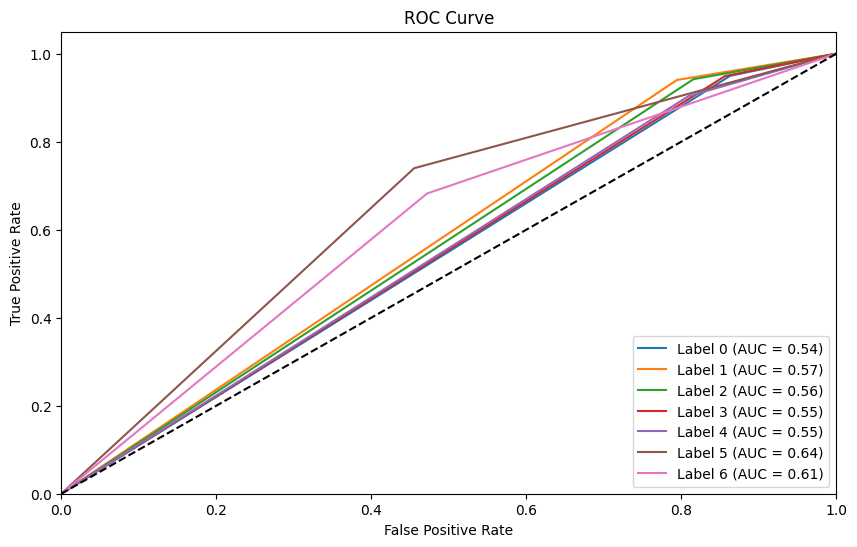

In [ ]:
plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
#predictions=preds
for i in range(y.shape[1]):
    fpr, tpr, _ = metrics.roc_curve(y_test[:,i], yprob[:,i])
    roc_auc_per_label[i] = metrics.roc_auc_score(y_test[:,i], yprob[:,i])
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))
# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 2. Matrix Evaluation Example Based


In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat, average='micro')
recall = recall_score(y_test, yhat, average='micro')
f1 = f1_score(y_test, yhat, average='micro')
hamming_loss_score = hamming_loss(y_test, yhat)
jaccard = jaccard_score(y_test, yhat, average='micro')
auc_roc = roc_auc_score(y_test, yhat)

In [ ]:
# Print results
print('Training Time:', round(training_time, 2), 'seconds')
print('Testing Time on Specific Test Set:', round(testing_time, 2), 'seconds')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Hamming Loss:', hamming_loss_score)
print('Jaccard Score:', jaccard)
print('AUC-ROC:', auc_roc)

Training Time: 102.83 seconds
Testing Time on Specific Test Set: 0.3 seconds
Accuracy: 0.29862766520990597
Precision: 0.8981031692581537
Recall: 0.8904461528810701
F1 Score: 0.8942582707193226
Hamming Loss: 0.17862109086781316
Jaccard Score: 0.8087406372020237
AUC-ROC: 0.5743555773349313


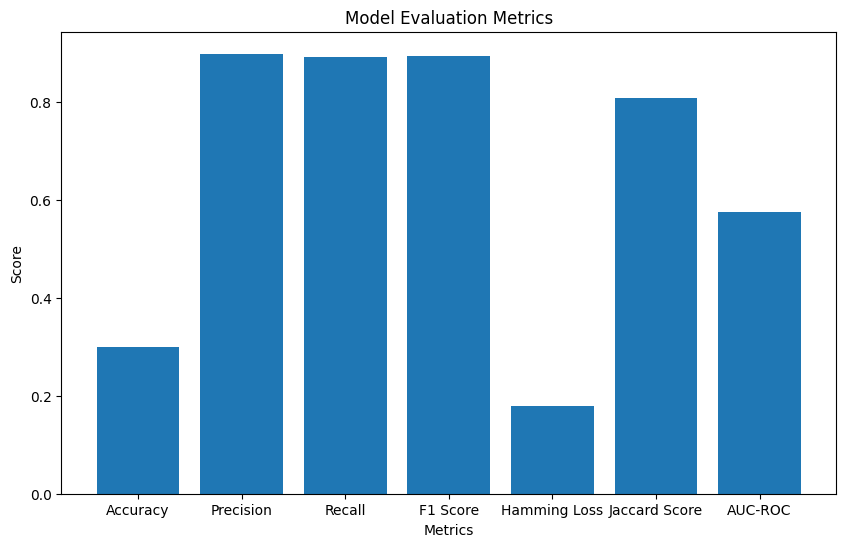

In [ ]:

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Hamming Loss', 'Jaccard Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, hamming_loss_score, jaccard, auc_roc]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
import sklearn.metrics

print('Exact Match Ratio: {0}'.format(sklearn.metrics.accuracy_score(y_test, yhat, normalize=True, sample_weight=None)))
print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_test, yhat))) 
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test, y_pred=yhat, average='samples'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test, y_pred=yhat, average='samples')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test, y_pred=yhat, average='samples'))) 

Exact Match Ratio: 0.29862766520990597
Hamming loss: 0.17862109086781316


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.892449990855831
Precision: 0.8845406395242508
F1 Measure: 0.8776211654191391


In [ ]:
#Subet Accuracy atau Exact Match Ratio
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.29862766520990597

In [ ]:
# HITUNG HAMMING LOSS
from sklearn.metrics import hamming_loss
hamming_loss(y_test, yhat)

0.17862109086781316

In [ ]:
from sklearn.metrics import jaccard_score
print('jaccard_score_Samples: {0}'.format(jaccard_score(y_test, yhat, average='samples')))
print('jaccard_score_Micro: {0}'.format(jaccard_score(y_test, yhat, average="micro")))
print('jaccard_score_Macro: {0}'.format(jaccard_score(y_test, yhat, average="macro")))


jaccard_score_Samples: 0.8040732148375175
jaccard_score_Micro: 0.8087406372020237
jaccard_score_Macro: 0.7942068993792172


In [ ]:
from sklearn.metrics import zero_one_loss
print('Zero_one_loss: {0}'.format(zero_one_loss(y_test, yhat)))
print('Zero_one_loss_Samples: {0}'.format(zero_one_loss(y_test, yhat, normalize=False)))

Zero_one_loss: 0.701372334790094
Zero_one_loss_Samples: 84737


In [ ]:
from sklearn.metrics import f1_score

print('f1_score_micro: {0}'.format(f1_score(y_test, yhat, average='micro')))
print('f1_score_macro: {0}'.format(f1_score(y_test, yhat, average='macro')))
print('f1_score_weighted: {0}'.format(f1_score(y_test, yhat, average='weighted')))
print('f1_score_none: {0}'.format(f1_score(y_test, yhat, average=None)))


f1_score_micro: 0.8942582707193226
f1_score_macro: 0.8760775580646211
f1_score_weighted: 0.8944417096245489
f1_score_none: [0.95479311 0.94510632 0.94705841 0.95299009 0.91005179 0.74051808
 0.6820251 ]


In [ ]:
from sklearn.metrics import fbeta_score

print('fbeta_macro: {0}'.format(fbeta_score(y_test, yhat, average='macro', beta=0.5)))
print('fbeta_micro: {0}'.format(fbeta_score(y_test, yhat, average='micro', beta=0.5)))
print('fbeta_weighted: {0}'.format(fbeta_score(y_test, yhat, average='weighted', beta=0.5)))
print('fbeta_none: {0}'.format(fbeta_score(y_test, yhat, average=None, beta=0.5)))

fbeta_macro: 0.8782753178291404
fbeta_micro: 0.896561249144165
fbeta_weighted: 0.8968599784960434
fbeta_none: [0.95781928 0.948007   0.95002446 0.95533334 0.91393427 0.74095102
 0.68185785]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print('recision_recall_fscore_support_macro: {0}'.format(precision_recall_fscore_support(y_test, yhat, average='macro')))
print('recision_recall_fscore_support_micro: {0}'.format(precision_recall_fscore_support(y_test, yhat, average='micro')))
print('recision_recall_fscore_support_weighted: {0}'.format(precision_recall_fscore_support(y_test, yhat, average='weighted')))
print('recision_recall_fscore_support_none: {0}'.format(precision_recall_fscore_support(y_test, yhat, average=None)))

recision_recall_fscore_support_macro: (0.8797485096116778, 0.8724463385310444, 0.8760775580646211, None)
recision_recall_fscore_support_micro: (0.8981031692581537, 0.8904461528810701, 0.8942582707193226, None)
recision_recall_fscore_support_weighted: (0.8984809796930944, 0.8904461528810701, 0.8944417096245489, None)
recision_recall_fscore_support_none: (array([0.9598474 , 0.9499507 , 0.95201218, 0.95690191, 0.91654104,
       0.74123993, 0.68174641]), array([0.94979177, 0.94031111, 0.94215593, 0.94911012, 0.90365379,
       0.73979764, 0.68230401]), array([0.95479311, 0.94510632, 0.94705841, 0.95299009, 0.91005179,
       0.74051808, 0.6820251 ]), array([115499, 113723, 114169, 115072, 109667,  77090,  72135]))


In [ ]:
from sklearn.metrics import precision_score
print('precision_score_macro: {0}'.format(precision_score(y_test, yhat, average='macro')))
print('precision_score_micro: {0}'.format(precision_score(y_test, yhat, average='micro')))
print('precision_score_weighted: {0}'.format(precision_score(y_test, yhat, average='weighted')))
print('precision_score_none: {0}'.format(precision_score(y_test, yhat, average=None)))
print('precision_score_zero_divisio: {0}'.format(precision_score(y_test, yhat, average=None, zero_division=1)))


precision_score_macro: 0.8797485096116778
precision_score_micro: 0.8981031692581537
precision_score_weighted: 0.8984809796930944
precision_score_none: [0.9598474  0.9499507  0.95201218 0.95690191 0.91654104 0.74123993
 0.68174641]
precision_score_zero_divisio: [0.9598474  0.9499507  0.95201218 0.95690191 0.91654104 0.74123993
 0.68174641]


In [ ]:
from sklearn.metrics import recall_score
print('recall_score_macro: {0}'.format(recall_score(y_test, yhat, average='macro')))
print('recall_score_micro: {0}'.format(recall_score(y_test, yhat, average='micro')))
print('recall_score_weighted: {0}'.format(recall_score(y_test, yhat, average='weighted')))
print('recall_score_none: {0}'.format(recall_score(y_test, yhat, average=None)))
print('recall_score_zero_divisio: {0}'.format(recall_score(y_test, yhat, average=None, zero_division=1)))


recall_score_macro: 0.8724463385310444
recall_score_micro: 0.8904461528810701
recall_score_weighted: 0.8904461528810701
recall_score_none: [0.94979177 0.94031111 0.94215593 0.94911012 0.90365379 0.73979764
 0.68230401]
recall_score_zero_divisio: [0.94979177 0.94031111 0.94215593 0.94911012 0.90365379 0.73979764
 0.68230401]


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, yhat)

array([[[   728,   4589],
        [  5799, 109700]],

       [[  1459,   5634],
        [  6788, 106935]],

       [[  1225,   5422],
        [  6604, 107565]],

       [[   825,   4919],
        [  5856, 109216]],

       [[  2125,   9024],
        [ 10566,  99101]],

       [[ 23817,  19909],
        [ 20059,  57031]],

       [[ 25705,  22976],
        [ 22917,  49218]]])

In [ ]:
# CLASSIFICATION REPORT : precision, recacll f1-score support every label
from sklearn.metrics import classification_report 
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95    115499
           1       0.95      0.94      0.95    113723
           2       0.95      0.94      0.95    114169
           3       0.96      0.95      0.95    115072
           4       0.92      0.90      0.91    109667
           5       0.74      0.74      0.74     77090
           6       0.68      0.68      0.68     72135

   micro avg       0.90      0.89      0.89    717355
   macro avg       0.88      0.87      0.88    717355
weighted avg       0.90      0.89      0.89    717355
 samples avg       0.89      0.88      0.88    717355



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Actual \n", y_test)
print("\nPredicted \n", yhat)

Actual 
 [[1 1 1 ... 1 0 0]
 [0 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 0 1]]

Predicted 
 [[1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
